In [1]:
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

### Controllers errors dataset of the simulation

The controllerError.csv is a file that contains the dataset of the errors of fifteen simulation tests of the autonomous landing process of a drone on a landing platform. Three controllers were tested (P Proportional, PI Proportinal-Integral, PID Proportinal-Integral-Derivative), five times each, to determine which of them have a better performance.

In the dataset each controller was tested five times, the dataset must have four columns per test (timestamp, errors in X, Y and angle), each test is named as its controller and numerate from 1 to 5, for example *P1_error_X* makes reference to the error in X of first test of the controller P.

In [2]:
error_file = "./data/controllerError_2.csv"
data = pd.read_csv(error_file)

The _controller_times_ dictionary contains the duration time of the simulation for each landing process. The time of the tests must be saved with the name of the test (as described above) in the _controllerTestTime.csv_ file n the columns _test_ and _duration_time_.

In [3]:
controller_times = {}

with open("./data/controllerTestTime_2.csv", "r") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    next(csv_reader)
    for row in csv_reader:
        controller_times[row[0]] = float(row[1])

print(controller_times)


{'P1': 42.22, 'P2': 46.97, 'P3': 73.98, 'P4': 52.94, 'P5': 56.34, 'PI1': 45.06, 'PI2': 55.11, 'PI3': 35.96, 'PI4': 34.0, 'PI5': 35.43, 'PID1': 29.04, 'PID2': 58.41, 'PID3': 51.92, 'PID4': 42.9, 'PID5': 52.57}


In [4]:
print("Data size:", data.shape)
print("Data Columns:", data.columns)

Data size: (866, 60)
Data Columns: Index(['P1_time_percent', 'P1_error_X', 'P1_error_Y', 'P1_error_Angle',
       'P2_time_percent', 'P2_error_X', 'P2_error_Y', 'P2_error_Angle',
       'P3_time_percent', 'P3_error_X', 'P3_error_Y', 'P3_error_Angle',
       'P4_time_percent', 'P4_error_X', 'P4_error_Y', 'P4_error_Angle',
       'P5_time_percent', 'P5_error_X', 'P5_error_Y', 'P5_error_Angle',
       'PI1_time_percent', 'PI1_error_X', 'PI1_error_Y', 'PI1_error_Angle',
       'PI2_time_percent', 'PI2_error_X', 'PI2_error_Y', 'PI2_error_Angle',
       'PI3_time_percent', 'PI3_error_X', 'PI3_error_Y', 'PI3_error_Angle',
       'PI4_time_percent', 'PI4_error_X', 'PI4_error_Y', 'PI4_error_Angle',
       'PI5_time_percent', 'PI5_error_X', 'PI5_error_Y', 'PI5_error_Angle',
       'PID1_time_percent', 'PID1_error_X', 'PID1_error_Y', 'PID1_error_Angle',
       'PID2_time_percent', 'PID2_error_X', 'PID2_error_Y', 'PID2_error_Angle',
       'PID3_time_percent', 'PID3_error_X', 'PID3_error_Y', 'PID3

In [5]:
data

,P1_time_percent,P1_error_X,P1_error_Y,P1_error_Angle,P2_time_percent,P2_error_X,P2_error_Y,P2_error_Angle,P3_time_percent,P3_error_X,P3_error_Y,P3_error_Angle,P4_time_percent,P4_error_X,P4_error_Y,P4_error_Angle,P5_time_percent,P5_error_X,P5_error_Y,P5_error_Angle,PI1_time_percent,PI1_error_X,PI1_error_Y,PI1_error_Angle,PI2_time_percent,PI2_error_X,PI2_error_Y,PI2_error_Angle,PI3_time_percent,PI3_error_X,PI3_error_Y,PI3_error_Angle,PI4_time_percent,PI4_error_X,PI4_error_Y,PI4_error_Angle,PI5_time_percent,PI5_error_X,PI5_error_Y,PI5_error_Angle,PID1_time_percent,PID1_error_X,PID1_error_Y,PID1_error_Angle,PID2_time_percent,PID2_error_X,PID2_error_Y,PID2_error_Angle,PID3_time_percent,PID3_error_X,PID3_error_Y,PID3_error_Angle,PID4_time_percent,PID4_error_X,PID4_error_Y,PID4_error_Angle,PID5_time_percent,PID5_error_X,PID5_error_Y,PID5_error_Angle
0,2.839785e+12,142.719742,116.509270,-36.990025,2.791697e+12,156.662964,108.199387,-38.915462,2880469000000,157.180695,104.585068,-33.519306,2.802321e+12,131.717743,100.464310,-25.948696,2.787377e+12,144.080444,108.727936,-37.721161,2.860869e+12,148.498276,128.256958,-36.660713,2.795269e+12,146.223969,113.318985,-34.684799,2.789853e+12,148.712952,113.924347,-40.343563,2.794001e+12,150.237976,104.456406,-27.456942,2.783693e+12,156.782120,114.587898,-30.252295,2.789485e+12,182.524475,139.400970,-36.556133,2.801409e+12,143.784927,107.567856,-38.682869,2.844341e+12,165.801086,106.747253,-35.539108,2.782809e+12,160.511276,119.082245,-43.411438,2.846573e+12,180.640610,131.607727,-22.702271
1,2.839893e+12,142.800461,116.509361,-37.042511,2.791809e+12,165.827393,120.680138,-38.685604,2880553000000,157.210876,104.953369,-33.415478,2.802421e+12,133.034866,103.664093,-28.060776,2.787473e+12,143.859360,108.565430,-37.865322,2.860869e+12,148.712875,130.831390,-21.056482,2.795385e+12,154.015427,123.499619,-34.220116,2.789941e+12,147.852066,116.436157,-40.248901,2.794001e+12,150.123138,104.894073,-29.112925,2.783789e+12,156.613449,114.115303,-30.160608,2.789577e+12,185.473282,141.659073,-36.516521,2.801497e+12,150.650085,117.486473,-38.693142,2.844433e+12,166.811554,108.199692,-35.483807,2.782929e+12,160.970245,119.412483,-44.101791,2.846649e+12,183.349915,134.575684,-22.253206
2,2.839981e+12,133.373016,113.625786,-35.509178,2.791921e+12,152.898483,111.143036,-35.948112,2880661000000,157.241043,105.321671,-33.311649,2.802525e+12,132.932587,103.984344,-27.721069,2.787573e+12,136.788177,114.994041,-39.824165,2.860973e+12,149.225342,132.310776,-20.108719,2.795465e+12,154.493668,124.197456,-34.116917,2.789941e+12,147.264648,117.870308,-39.773567,2.794089e+12,150.199615,104.744247,-29.056757,2.783893e+12,158.248169,127.313919,-32.476326,2.789661e+12,188.422104,143.917175,-36.476913,2.801497e+12,153.707016,121.466408,-39.346443,2.844525e+12,160.885147,109.202103,-36.857460,2.783045e+12,161.429199,119.742729,-44.792145,2.846757e+12,149.602051,118.550064,-24.569696
3,2.840061e+12,132.659286,113.384941,-35.482990,2.791921e+12,146.633575,108.228302,-35.489548,2880781000000,180.673172,130.866821,-14.399608,2.802625e+12,154.155701,126.520149,-29.237946,2.787649e+12,136.019226,115.358696,-40.066811,2.861057e+12,132.368774,117.117935,-24.175343,2.795741e+12,154.971893,124.895302,-34.013718,2.790021e+12,143.198059,117.052643,-39.430981,2.794205e+12,147.966873,104.882919,-29.461525,2.784001e+12,158.225204,127.946091,-32.499229,2.789749e+12,197.172607,163.474792,-36.243401,2.801593e+12,136.685501,108.645401,-39.225574,2.844625e+12,161.301346,110.615982,-36.878384,2.783153e+12,161.888168,120.072968,-45.482502,2.847021e+12,149.132751,119.862015,-24.265877
4,2.840241e+12,131.945572,113.144096,-35.456806,2.792029e+12,146.355515,108.482635,-35.357693,2880881000000,191.004211,142.339462,-0.419367,2.802733e+12,155.862427,128.724915,-28.999418,2.787781e+12,135.250275,115.723351,-40.309456,2.861061e+12,129.335739,114.055969,-27.897478,2.795829e+12,155.450134,125.593140,-33.910519,2.790101e+12,151.884888,125.913033,-37.472027,2.

Calculate the time for each sample given the total time of each test and the timestamp of the simulation (time_percent in the dataset), knowing that the relationship between the duration time of the test and the timestamp is linear. It important to notice that the starting point of the duration time of the test is zero.

$\displaystyle m = \frac{time_{total}}{timestamp_n-timestamp_0}$ where $timestamp_0$ is the first value of the timestamps, $timestamp_n$ is the last value of the timestamps and $total time$ is the duration of the test.

$\displaystyle b = m.timestamp_n + time_{total}$

The linear relantionship between the timestamp ant the duration time of the tests is :
$\displaystyle time = m.timestamp + b$

In [6]:
for test, test_time in controller_times.items():    

    first_val_tstamp = data[test+"_time_percent"][0]
    last_val_tstamp = data[test+"_time_percent"][data.apply(lambda column: column.dropna().index[-1])[test+"_time_percent"]]
    
    m = test_time / (last_val_tstamp - first_val_tstamp)
    b = test_time - m * last_val_tstamp
    
    data[test+"_time"] = m * data[test+"_time_percent"] + b
    
#    last_time = data[test+"_time"][data.apply(lambda column: column.dropna().index[-1])[test+"_time"]]
#    print(test, test_time, last_time)

data = data.reindex(columns=sorted(data.columns))

    
# data.apply(lambda column: column.dropna().index[-1])["P1_time_percent"] #Get last non NaN value of a column



In [7]:
data

,P1_error_Angle,P1_error_X,P1_error_Y,P1_time,P1_time_percent,P2_error_Angle,P2_error_X,P2_error_Y,P2_time,P2_time_percent,P3_error_Angle,P3_error_X,P3_error_Y,P3_time,P3_time_percent,P4_error_Angle,P4_error_X,P4_error_Y,P4_time,P4_time_percent,P5_error_Angle,P5_error_X,P5_error_Y,P5_time,P5_time_percent,PI1_error_Angle,PI1_error_X,PI1_error_Y,PI1_time,PI1_time_percent,PI2_error_Angle,PI2_error_X,PI2_error_Y,PI2_time,PI2_time_percent,PI3_error_Angle,PI3_error_X,PI3_error_Y,PI3_time,PI3_time_percent,PI4_error_Angle,PI4_error_X,PI4_error_Y,PI4_time,PI4_time_percent,PI5_error_Angle,PI5_error_X,PI5_error_Y,PI5_time,PI5_time_percent,PID1_error_Angle,PID1_error_X,PID1_error_Y,PID1_time,PID1_time_percent,PID2_error_Angle,PID2_error_X,PID2_error_Y,PID2_time,PID2_time_percent,PID3_error_Angle,PID3_error_X,PID3_error_Y,PID3_time,PID3_time_percent,PID4_error_Angle,PID4_error_X,PID4_error_Y,PID4_time,PID4_time_percent,PID5_error_Angle,PID5_error_X,PID5_error_Y,PID5_time,PID5_time_percent
0,-36.990025,142.719742,116.509270,0.000000,2.839785e+12,-38.915462,156.662964,108.199387,-4.547474e-13,2.791697e+12,-33.519306,157.180695,104.585068,0.000000,2880469000000,-25.948696,131.717743,100.464310,0.000000,2.802321e+12,-37.721161,144.080444,108.727936,0.000000,2.787377e+12,-36.660713,148.498276,128.256958,-4.547474e-13,2.860869e+12,-34.684799,146.223969,113.318985,4.547474e-13,2.795269e+12,-40.343563,148.712952,113.924347,0.000000,2.789853e+12,-27.456942,150.237976,104.456406,0.000000,2.794001e+12,-30.252295,156.782120,114.587898,0.000000,2.783693e+12,-36.556133,182.524475,139.400970,0.000000,2.789485e+12,-38.682869,143.784927,107.567856,0.000000,2.801409e+12,-35.539108,165.801086,106.747253,0.000000,2.844341e+12,-43.411438,160.511276,119.082245,4.547474e-13,2.782809e+12,-22.702271,180.640610,131.607727,0.000000,2.846573e+12
1,-37.042511,142.800461,116.509361,0.112843,2.839893e+12,-38.685604,165.827393,120.680138,1.171217e-01,2.791809e+12,-33.415478,157.210876,104.953369,0.085966,2880553000000,-28.060776,133.034866,103.664093,0.103149,2.802421e+12,-37.865322,143.859360,108.565430,0.099234,2.787473e+12,-21.056482,148.712875,130.831390,-4.547474e-13,2.860869e+12,-34.220116,154.015427,123.499619,1.207913e-01,2.795385e+12,-40.248901,147.852066,116.436157,0.092151,2.789941e+12,-29.112925,150.123138,104.894073,0.000000,2.794001e+12,-30.160608,156.613449,114.115303,0.103019,2.783789e+12,-36.516521,185.473282,141.659073,0.103042,2.789577e+12,-38.693142,150.650085,117.486473,0.089705,2.801497e+12,-35.483807,166.811554,108.199692,0.095046,2.844433e+12,-44.101791,160.970245,119.412483,1.276153e-01,2.782929e+12,-22.253206,183.349915,134.575684,0.078315,2.846649e+12
2,-35.509178,133.373016,113.625786,0.204789,2.839981e+12,-35.948112,152.898483,111.143036,2.342435e-01,2.791921e+12,-33.311649,157.241043,105.321671,0.196494,2880661000000,-27.721069,132.932587,103.984344,0.210423,2.802525e+12,-39.824165,136.788177,114.994041,0.202602,2.787573e+12,-20.108719,149.225342,132.310776,1.106812e-01,2.860973e+12,-34.116917,154.493668,124.197456,2.040957e-01,2.795465e+12,-39.773567,147.264648,117.870308,0.092151,2.789941e+12,-29.056757,150.199615,104.744247,0.093093,2.794089e+12,-32.476326,158.248169,127.313919,0.214623,2.783893e+12,-36.476913,188.422104,143.917175,0.197124,2.789661e+12,-39.346443,153.707016,121.466408,0.089705,2.801497e+12,-36.857460,160.885147,109.202103,0.190092,2.844525e+12,-44.792145,161.429199,119.742729,2.509767e-01,2.783045e+12,-24.569696,149.602051,118.550064,0.189605,2.846757e+12
3,-35.482990,132.659286,113.384941,0.288377,2.840061e+12,-35.489548,146.633575,108.228302,2.342435e-01,2.791921e+12,-14.399608,180.673172,130.866821,0.319303,2880781000000,-29.237946,154.155701,126.520149,0.313572,2.802625e+12,-40.066811,136.019226,115.358696,0.281162,2.787649e+12,-24.175343,132.368774,117.117935,2.000775e-01,2.861057e+12,-34.013718,154.971893,124.895302,4.914957e-01,2.795741e+12,-39.430981,143.198059,117.052643,0.175925,2.790021e+12,-29.461525,147.9668

## Which controller is better?
The five results obtained for each controller will be graphed and the best result per controller will be chosen to compare the three controllers and decide which of them has the best performance for the landing process.

### Organizing the data to plot the controllers

In [8]:
controllers = pd.DataFrame(columns=["Time", "Controller", "Error_X", "Error_Y", "Error_Angle"])

for test in controller_times:
    control = pd.DataFrame(columns=["Time", "Controller", "Error_X", "Error_Y", "Error_Angle"])
    row_num = data.apply(lambda column: column.dropna().index[-1])[test+"_time"]
    
    control["Time"] = data[test+"_time"][0:row_num+1]
    control["Error_X"] = data[test+"_error_X"][0:row_num+1]
    control["Error_Y"] = data[test+"_error_Y"][0:row_num+1]
    control["Error_Angle"] = data[test+"_error_Angle"][0:row_num+1]
    control["Controller"] = test
    
    controllers = controllers.append(control, ignore_index = True)

    del control

controllers

,Time,Controller,Error_X,Error_Y,Error_Angle
0,0.000000,P1,142.719742,116.509270,-36.990025
1,0.112843,P1,142.800461,116.509361,-37.042511
2,0.204789,P1,133.373016,113.625786,-35.509178
3,0.288377,P1,132.659286,113.384941,-35.482990
4,0.476448,P1,131.945572,113.144096,-35.456806
...,...,...,...,...,...
8279,52.409248,PID5,2.792999,-1.205154,0.055305
8280,52.409248,PID5,3.839294,-0.481552,1.929891
8281,52.413370,PID5,-1.106293,-0.066269,1.649763
8282,52.549391,PID5,3.531128,-1.380905,1.489820


### Error graphs for controller P
Create a subset with the five tests of the P (proportional) controller to decide which of the test performed better.

In [9]:
controller_P = controllers[
    (controllers.Controller == "P1") |
    (controllers.Controller == "P2") |
    (controllers.Controller == "P3") |
    (controllers.Controller == "P4") |
    (controllers.Controller == "P5")
].copy()
controller_P

,Time,Controller,Error_X,Error_Y,Error_Angle
0,0.000000,P1,142.719742,116.509270,-36.990025
1,0.112843,P1,142.800461,116.509361,-37.042511
2,0.204789,P1,133.373016,113.625786,-35.509178
3,0.288377,P1,132.659286,113.384941,-35.482990
4,0.476448,P1,131.945572,113.144096,-35.456806
...,...,...,...,...,...
3296,55.839696,P5,2.076630,6.953415,-0.131336
3297,55.955469,P5,1.582489,7.718597,-0.072013
3298,56.071242,P5,1.305084,7.699341,-0.086043
3299,56.199419,P5,0.854736,7.274048,-0.038025


Text(0.5, 0.98, 'P Controller Errors')

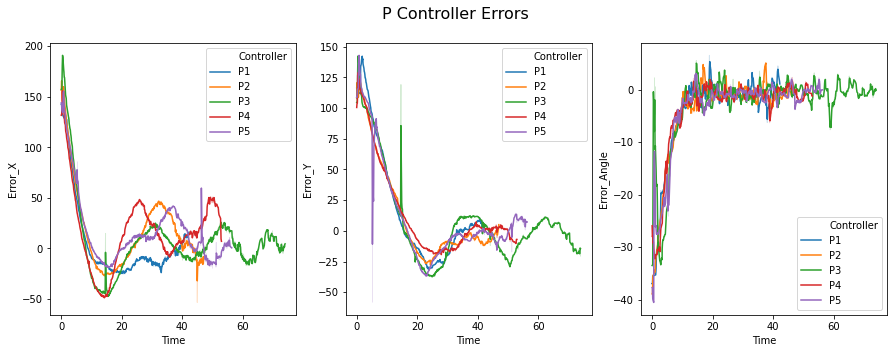

In [10]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))

sns.lineplot(data=controller_P, x="Time", y="Error_X",
             hue="Controller", ax=ax[0])
sns.lineplot(data=controller_P, x="Time", y="Error_Y",
             hue="Controller", ax=ax[1])
sns.lineplot(data=controller_P, x="Time", y="Error_Angle",
             hue="Controller", ax=ax[2])

fig.suptitle('P Controller Errors', fontsize=16)

### Error graphs for controller PI

In [11]:
controller_PI = controllers[
    (controllers.Controller == "PI1") |
    (controllers.Controller == "PI2") |
    (controllers.Controller == "PI3") |
    (controllers.Controller == "PI4") |
    (controllers.Controller == "PI5")
].copy()
controller_PI

,Time,Controller,Error_X,Error_Y,Error_Angle
3301,-4.547474e-13,PI1,148.498276,128.256958,-36.660713
3302,-4.547474e-13,PI1,148.712875,130.831390,-21.056482
3303,1.106812e-01,PI1,149.225342,132.310776,-20.108719
3304,2.000775e-01,PI1,132.368774,117.117935,-24.175343
3305,2.043344e-01,PI1,129.335739,114.055969,-27.897478
...,...,...,...,...,...
5732,3.491920e+01,PI5,-8.186798,-2.288910,-1.661454
5733,3.505226e+01,PI5,-10.515472,-1.769012,-1.646683
5734,3.517245e+01,PI5,-2.430481,0.730301,-3.505382
5735,3.531840e+01,PI5,-0.802551,0.491867,-2.141308


Text(0.5, 0.98, 'PI Controller Errors')

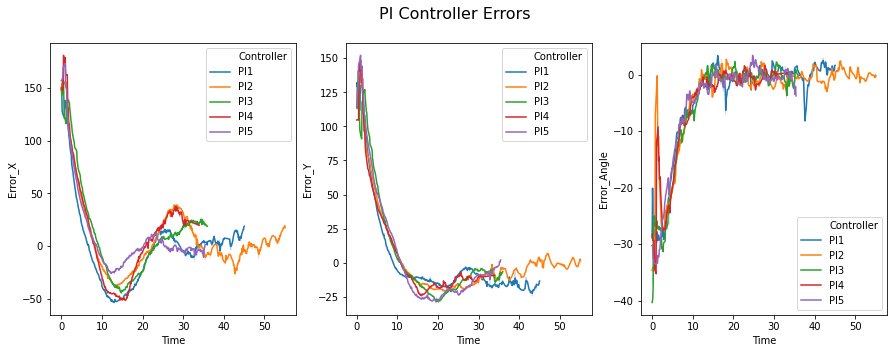

In [15]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))

sns.lineplot(data=controller_PI, x="Time", y="Error_X",
             hue="Controller", ax=ax[0])

sns.lineplot(data=controller_PI, x="Time", y="Error_Y",
             hue="Controller", ax=ax[1])

sns.lineplot(data=controller_PI, x="Time", y="Error_Angle",
             hue="Controller", ax=ax[2])

fig.suptitle('PI Controller Errors', fontsize=16)

### Error graphs for controller PID

In [13]:
controller_PID = controllers[
    (controllers.Controller == "PID1") |
    (controllers.Controller == "PID2") |
    (controllers.Controller == "PID3") |
    (controllers.Controller == "PID4") |
    (controllers.Controller == "PID5")
].copy()
controller_PID

,Time,Controller,Error_X,Error_Y,Error_Angle
5737,0.000000,PID1,182.524475,139.400970,-36.556133
5738,0.103042,PID1,185.473282,141.659073,-36.516521
5739,0.197124,PID1,188.422104,143.917175,-36.476913
5740,0.295687,PID1,197.172607,163.474792,-36.243401
5741,0.407689,PID1,200.600891,167.162582,-36.193565
...,...,...,...,...,...
8279,52.409248,PID5,2.792999,-1.205154,0.055305
8280,52.409248,PID5,3.839294,-0.481552,1.929891
8281,52.413370,PID5,-1.106293,-0.066269,1.649763
8282,52.549391,PID5,3.531128,-1.380905,1.489820


Text(0.5, 0.98, 'PID Controller Errors')

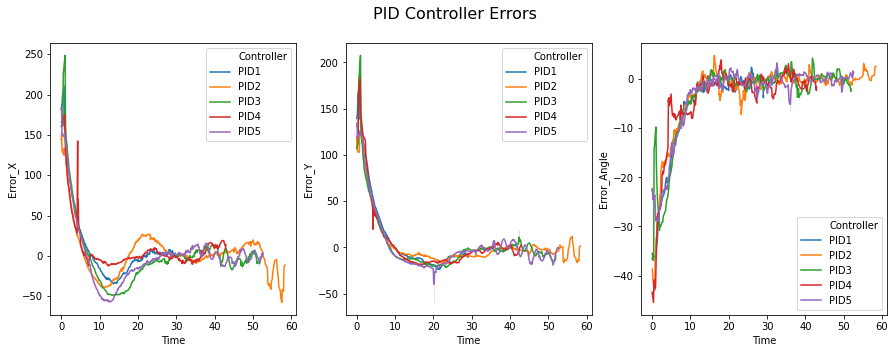

In [16]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))

sns.lineplot(data=controller_PID, x="Time", y="Error_X",
             hue="Controller", ax=ax[0])

sns.lineplot(data=controller_PID, x="Time", y="Error_Y",
             hue="Controller", ax=ax[1])

sns.lineplot(data=controller_PID, x="Time", y="Error_Angle",
             hue="Controller", ax=ax[2])

fig.suptitle('PID Controller Errors', fontsize=16)